In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

,English,Mathematics,Japanese
0,85,63,58
1,76,55,81
2,75,61,67
3,62,82,66
4,93,58,82
5,60,66,76
6,49,80,61
7,59,99,61
8,48,78,65
9,80,77,70


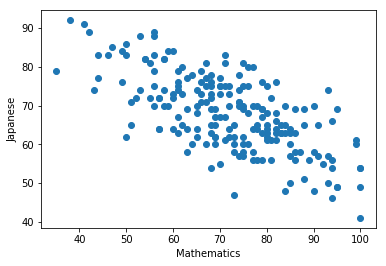

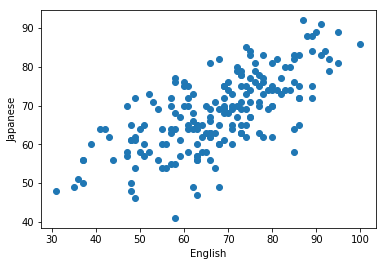

In [98]:
# 分布の作り
## 数学と国語に負の相関がある
## 英語と国語に正の相関がある

columns = ['Name', 'English', 'Mathematics', 'Japanese']
names = ['kawasaki',
         'fujisawa',
         'kikukawa',
         'kanaya',
         'takatsuka',
         'totsuka',
         'okazaki',
         'ogaki',
         'mishima',
         'oofuna',
         'oiso',
         'ninomiya',
         'hayakawa',
         'toyohashi']
leng = 200
columns = ['English', 'Mathematics', 'Japanese']
japanese = [min(100, int(np.random.normal(70, 10))) for i in range(leng)]
math = [min(100, int(np.random.normal(140-j, 10))) for j in japanese]
english = [min(100, int(np.random.normal(j, 10))) for j in japanese]



plt.figure()
plt.ylabel("Japanese")
plt.xlabel("Mathematics")
plt.scatter(math,japanese)

plt.figure()
plt.ylabel("Japanese")
plt.xlabel("English")
plt.scatter(english,japanese)

tokai_class = pd.DataFrame([english, math, japanese]).T
tokai_class.columns = columns

tokai_class

In [99]:
# 欠損値を作る
# marで数箇所
tokai_mar = tokai_class.copy()
tokai_mar['Japanese'] = tokai_mar['Japanese'].replace(tokai_mar[tokai_mar['English']<62]['Japanese'], np.NaN)

tokai_mar

,English,Mathematics,Japanese
0,85,63,58.0
1,76,55,81.0
2,75,61,67.0
3,62,82,66.0
4,93,58,82.0
5,60,66,NaN
6,49,80,NaN
7,59,99,NaN
8,48,78,NaN
9,80,77,70.0


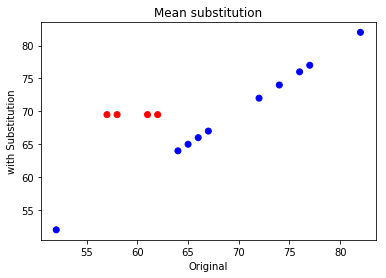

In [21]:
# 平均値代入法(JapaneseのMARパターンの欠損に対応)
tokai_mean = tokai_mar.copy()
tokai_mean.Japanese = tokai_mar.Japanese.fillna(tokai_mar.Japanese.mean())

# 以下可視化
plt.title("Mean substitution")
plt.xlabel("Original")
plt.ylabel("with Substitution")
col = ['r' if c else 'b' for c in tokai_mar.Japanese.isna()]
plt.scatter(tokai_class.Japanese, tokai_mean.Japanese, c=col)

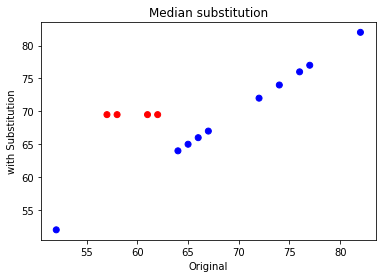

In [22]:
# 中央値代入法(JapaneseのMARパターンの欠損に対応)
tokai_median = tokai_mar.copy()
tokai_median.Japanese = tokai_mar.Japanese.fillna(tokai_mar.Japanese.median())

# 以下可視化
plt.title("Median substitution")
plt.xlabel("Original")
plt.ylabel("with Substitution")
col = ['r' if c else 'b' for c in tokai_mar.Japanese.isna()]
plt.scatter(tokai_class.Japanese, tokai_median.Japanese, c=col)

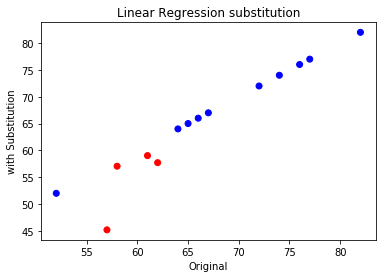

In [23]:
# 回帰代入法（JapaneseのMARパターンの欠損に対応）
tokai_reg = tokai_mar.copy()
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
ja_isna = tokai_reg.Japanese.isna()
reg.fit(tokai_reg.loc[~ja_isna, ['English']], tokai_reg.loc[~ja_isna, 'Japanese'])
pred = reg.predict(tokai_reg.loc[ja_isna, ['English']])
tokai_reg.loc[ja_isna, 'Japanese'] = pred

# 以下可視化
plt.title("Linear Regression substitution")
plt.xlabel("Original")
plt.ylabel("with Substitution")
col = ['r' if c else 'b' for c in tokai_mar.Japanese.isna()]
plt.scatter(tokai_class.Japanese, tokai_reg.Japanese, c=col)

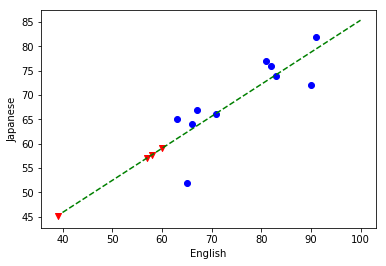

In [24]:
plt.scatter(x=tokai_reg[~ja_isna].English, y=tokai_reg[~ja_isna].Japanese, c='b')
plt.scatter(x=tokai_reg[ja_isna].English, y=tokai_reg[ja_isna].Japanese, c='r', marker='v')
x = np.linspace(40, 100)
plt.xlabel('English')
plt.ylabel('Japanese')
plt.plot(x, reg.coef_[0] * x + reg.intercept_, c='g', linestyle='dashed')

In [14]:
tokai_reg

,Name,English,Mathematics,Japanese
0,kawasaki,59,71,56.437765
1,fujisawa,56,71,53.963932
2,kikukawa,69,81,64.000000
3,kanaya,71,100,57.000000
4,takatsuka,89,66,75.000000
5,totsuka,56,75,53.963932
6,okazaki,74,60,73.000000
7,ogaki,77,42,73.000000
8,mishima,55,78,53.139321
9,oofuna,80,62,78.000000
